---
# Business Objective:Bankruptcy Prevention


<center>
    <img src="https://thumbs.gfycat.com/PreciousConsciousBubblefish-size_restricted.gif" width="300"  align="center"/>
</center>

---


- This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy).

- The goal here is to model the probability that a business goes bankrupt from different features 

---



---






### Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")     # This Would Remove Any Deprecated Warning

In [2]:
# Read Excel File
df = pd.read_excel("bankruptcy-prevention.xlsx")
df.head()

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy


In [3]:
# Converting excel file into CSV file
df.to_csv("bankruptcy-prevention.csv", index=None)

In [4]:
# Reading csv file
df = pd.read_csv("bankruptcy-prevention.csv", sep=";")
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


---

The data file contains 7 features about 250 companies


---


* The data set includes the following variables:


---


1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).


---

## Exploratory Data Analysis (Data Overview)

In [5]:
df.shape

(250, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


+ All columns type are right excluding the target variable.
+ But our target variable in the object form.
+ Data is completely filled.

In [7]:
# Descriptive Statistics
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isna().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

+ No null values are there.

In [9]:
df.groupby(' class').describe().T   

class                        bankruptcy  non-bankruptcy
industrial_risk        count  107.000000      143.000000
                       mean     0.626168        0.437063
                       std      0.412616        0.393016
                       min      0.000000        0.000000
                       25%      0.500000        0.000000
                       50%      0.500000        0.500000
                       75%      1.000000        0.750000
                       max      1.000000        1.000000
 management_risk       count  107.000000      143.000000
                       mean     0.789720        0.482517
                       std      0.336725        0.412876
                       min      0.000000        0.000000
                       25%      0.500000        0.000000
                       50%      1.000000        0.500000
                       75%      1.000000        1.000000
                       max      1.000000        1.000000
 financial_flexibility count  107.000000      143.000000
                       mean     0.028037        0.636364
                       std      0.134441        0.331353
                       min      0.000000        0.000000
                       25%      0.000000        0.500000
                       50%      0.000000        0.500000
                       75%      0.000000        1.000000
                       max      1.000000        1.000000
 credibility           count  107.000000      143.000000
                       mean     0.107477        0.741259
                       std      0.238193        0.295823
                       min      0.000000        0.000000
                       25%      0.000000        0.500000
                       50%      0.000000        1.000000
                       75%      0.000000        1.000000
                       max      1.000000        1.000000
 competitiveness       count  107.000000      143.000000
                       mean     0.018692        0.818182
                       std      0.095296        0.241368
                       min      0.000000        0.500000
                       25%      0.000000        0.500000
                       50%      0.000000        1.000000
                       75%      0.000000        1.000000
                       max      0.500000        1.000000
 operating_risk        count  107.000000      143.000000
                       mean     0.710280        0.465035
                       std      0.388741        0.438669
                       min      0.000000        0.000000
                       25%      0.500000        0.000000
                       50%      1.000000        0.500000
                       75%      1.000000        1.000000
                       max      1.000000        1.000000

In [10]:
df.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

+ No of unique values under every column.

### Pie Plot of class

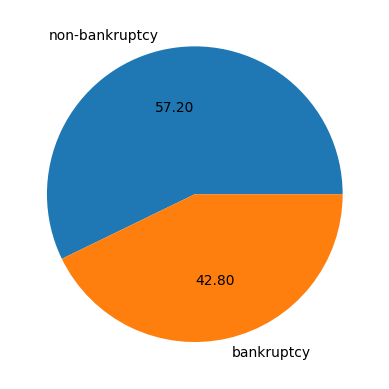

In [11]:
import matplotlib.pyplot as plt
plt.pie(df[' class'].value_counts(), labels=['non-bankruptcy','bankruptcy'],autopct="%0.2f")
plt.show()

## Data Preproccessing

In [12]:
df.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [13]:
df.columns=['ind_risk', 'manage_risk', 'financial_flex',
       'cred', 'competitive', 'operat_risk', 'class']

+ Rename our data to make it easy for further procedure.

In [14]:
# Encoding Target Variable
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df

,ind_risk,manage_risk,financial_flex,cred,competitive,operat_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


+ Using Label Encoding function we have converted our categorical target variable into numeric variable i.e. bankruptcy = 0, non-bankruptcy = 1 

In [15]:
df.dtypes

ind_risk          float64
manage_risk       float64
financial_flex    float64
cred              float64
competitive       float64
operat_risk       float64
class               int32
dtype: object

+ Data type of target variable (class) is changed from object to int.

In [16]:
# Checking Duplicates
df.duplicated().sum()

147

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 194
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ind_risk        103 non-null    float64
 1   manage_risk     103 non-null    float64
 2   financial_flex  103 non-null    float64
 3   cred            103 non-null    float64
 4   competitive     103 non-null    float64
 5   operat_risk     103 non-null    float64
 6   class           103 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 6.0 KB


In [20]:
df.corr()   # Correlation between variables

,ind_risk,manage_risk,financial_flex,cred,competitive,operat_risk,class
ind_risk,1.000000,0.225742,-0.074246,0.056011,-0.208575,0.152581,-0.217132
manage_risk,0.225742,1.000000,-0.163226,-0.112473,-0.125335,0.089500,-0.188887
financial_flex,-0.074246,-0.163226,1.000000,0.397757,0.525996,-0.000401,0.624573
cred,0.056011,-0.112473,0.397757,1.000000,0.524773,-0.110603,0.606350
competitive,-0.208575,-0.125335,0.525996,0.524773,1.000000,-0.052165,0.859809
operat_risk,0.152581,0.089500,-0.000401,-0.110603,-0.052165,1.000000,-0.136393
class,-0.217132,-0.188887,0.624573,0.606350,0.859809,-0.136393,1.000000


## Data Visualization

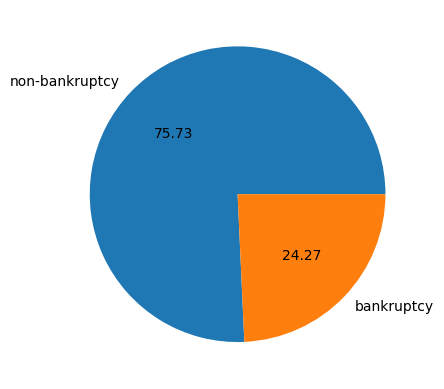

In [21]:
plt.pie(df['class'].value_counts(), labels=['non-bankruptcy','bankruptcy'],autopct="%0.2f")
plt.show()

<Figure size 640x480 with 0 Axes>

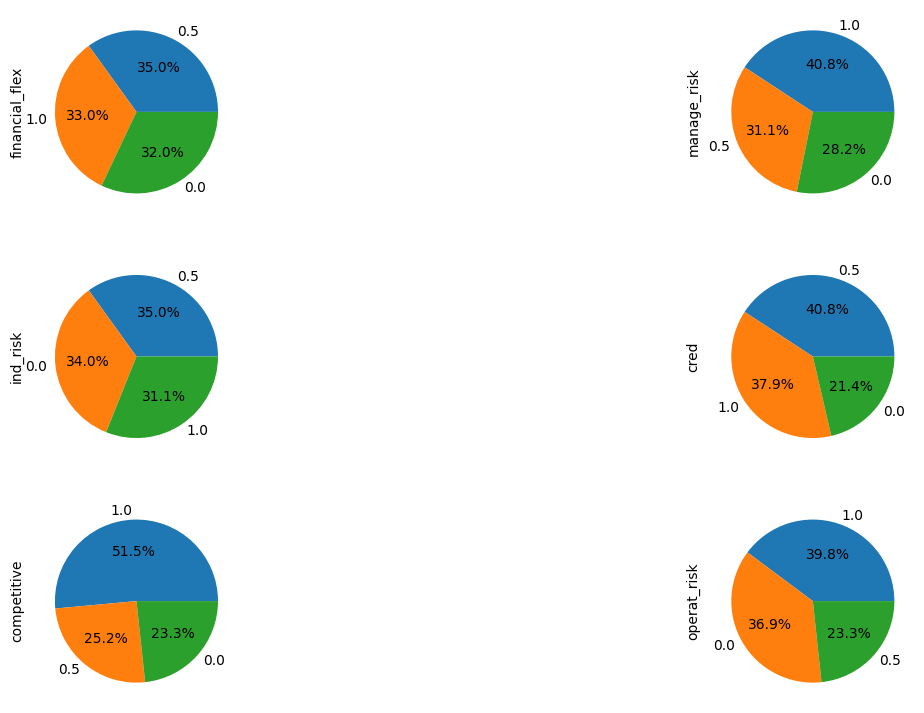

In [22]:
plt.subplots_adjust(left=0.1,bottom=0.1,right=2,top=2,wspace=0.8,hspace=0.5)
plt.figure(figsize=(16,9))
plt.subplot(3,2,1)
df['financial_flex'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,2)
df['manage_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,3)
df['ind_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,4)
df['cred'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,5)
df['competitive'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
df['operat_risk'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.subplot(3,2,6)
plt.show()

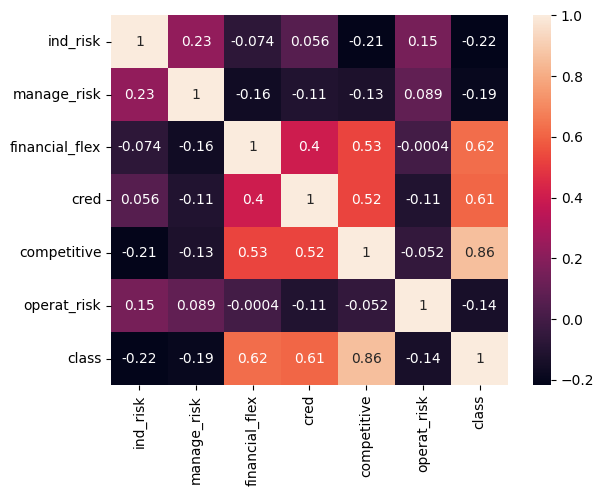

In [23]:
sns.heatmap(df.corr(), annot=True)
plt.show()

+ the correlation of each and every variable with one another is seen

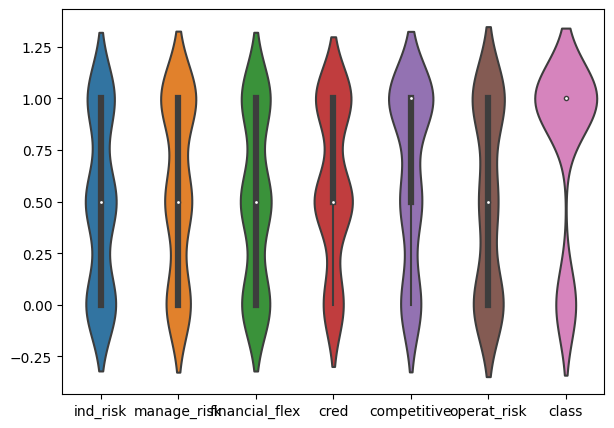

In [24]:
plt.figure(figsize=(7,5))
sns.violinplot(data=df)
plt.show()

+ by above plot we can state that there are no outliers in this dataset

In [25]:
df['ind_risk'].value_counts()

0.5    36
0.0    35
1.0    32
Name: ind_risk, dtype: int64

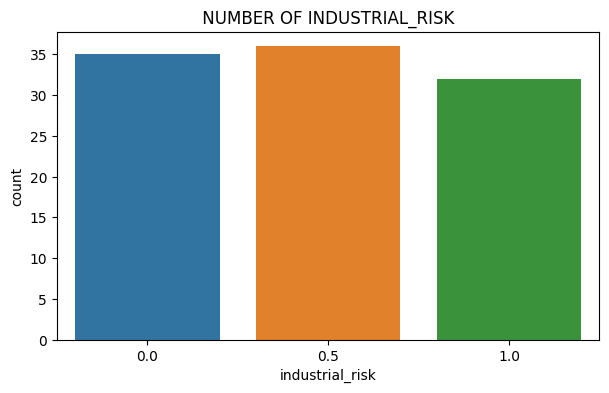

In [26]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = 'ind_risk',data = df)
plt.xlabel('industrial_risk')
plt.title(" NUMBER OF INDUSTRIAL_RISK ")
plt.show()

In [27]:
df['manage_risk'].value_counts()

1.0    42
0.5    32
0.0    29
Name: manage_risk, dtype: int64

Text(0.5, 1.0, ' NUMBER OF MANAGEMENT_RISK ')

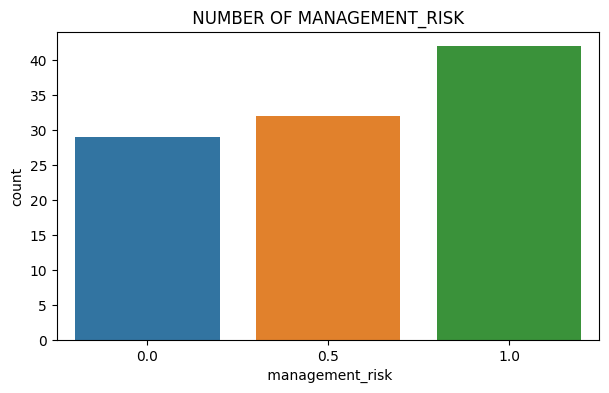

In [28]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = 'manage_risk',data = df)
plt.xlabel(' management_risk')
plt.title(" NUMBER OF MANAGEMENT_RISK ")

In [29]:
df['financial_flex'].value_counts()

0.5    36
1.0    34
0.0    33
Name: financial_flex, dtype: int64

Text(0.5, 1.0, ' NUMBER OF FINANCIAL_FLEXIBILITY ')

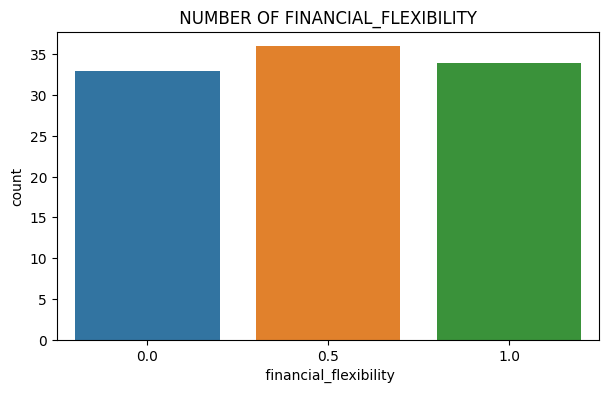

In [30]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = 'financial_flex',data = df)
plt.xlabel(' financial_flexibility')
plt.title(" NUMBER OF FINANCIAL_FLEXIBILITY ")

In [31]:
df['cred'].value_counts()

0.5    42
1.0    39
0.0    22
Name: cred, dtype: int64

Text(0.5, 1.0, ' NUMBER OF CREDIBILITY ')

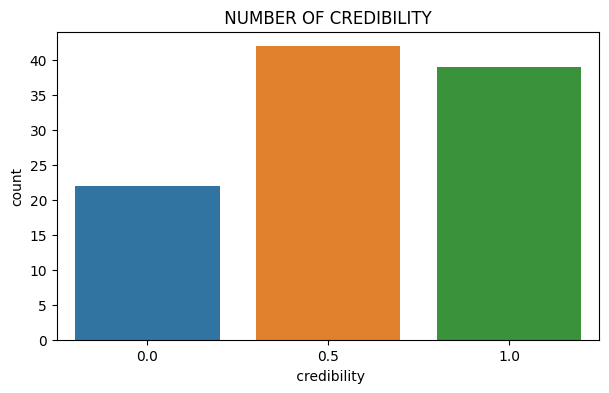

In [32]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = 'cred',data = df)
plt.xlabel(' credibility')
plt.title(" NUMBER OF CREDIBILITY ")

In [33]:
df['competitive'].value_counts()

1.0    53
0.5    26
0.0    24
Name: competitive, dtype: int64

Text(0.5, 1.0, ' NUMBER OF COMPETITIVENESS ')

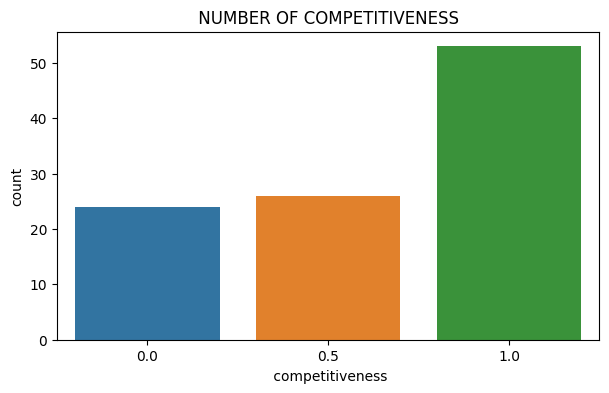

In [34]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = 'competitive',data = df)
plt.xlabel(' competitiveness')
plt.title(" NUMBER OF COMPETITIVENESS ")

In [35]:
df['operat_risk'].value_counts()

1.0    41
0.0    38
0.5    24
Name: operat_risk, dtype: int64

Text(0.5, 1.0, ' NUMBER OF OPERATING_RISK ')

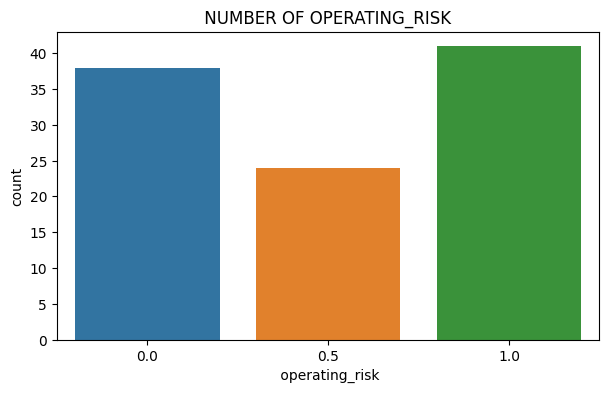

In [36]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(x = 'operat_risk',data = df)
plt.xlabel(' operating_risk')
plt.title(" NUMBER OF OPERATING_RISK ")

<AxesSubplot: ylabel='Density'>

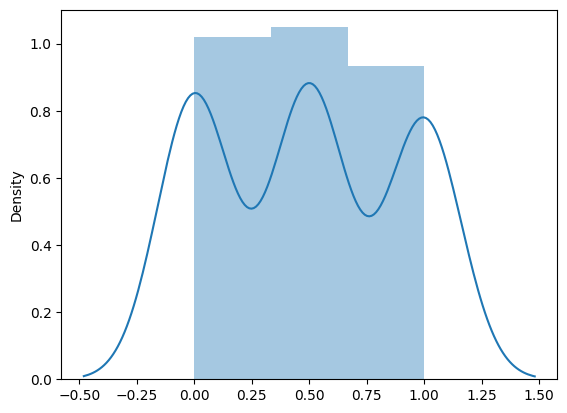

In [37]:
sns.distplot([df['ind_risk']])

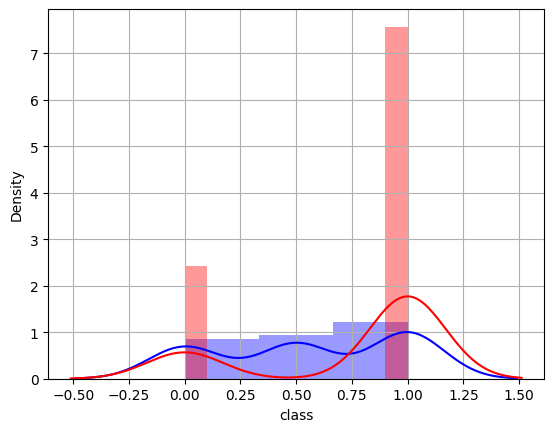

In [38]:
sns.distplot(df['manage_risk'], color="Blue")
sns.distplot(df['class'], color='Red')
plt.grid('off') 

### Histogram for Industrial risk

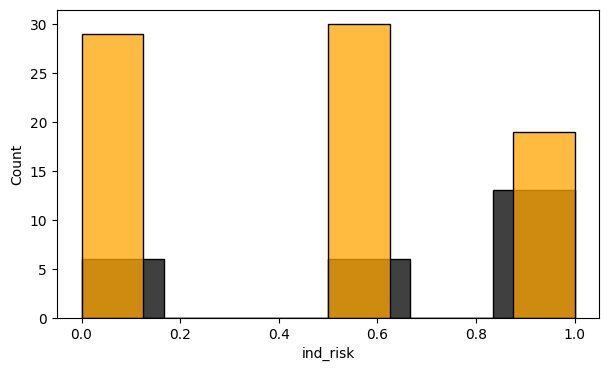

In [39]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class'] == 0]['ind_risk'],color= 'black')      # bankruptcy industrial_risk
sns.histplot(df[df['class'] == 1]['ind_risk'],color='orange')
plt.show()

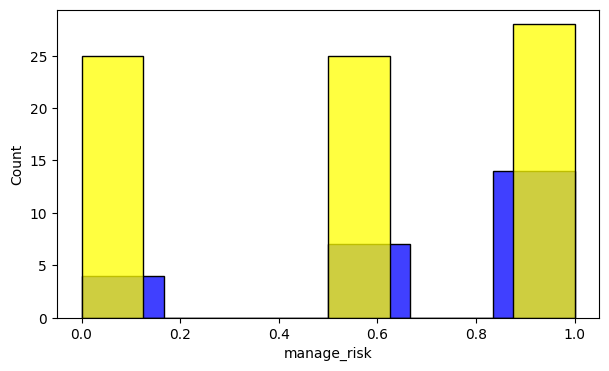

In [40]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class'] == 0]['manage_risk'],color= 'blue')     # bankruptcy industrial_risk
sns.histplot(df[df['class'] == 1]['manage_risk'],color='yellow')     # non-bankruptcy industrial_risk
plt.show()

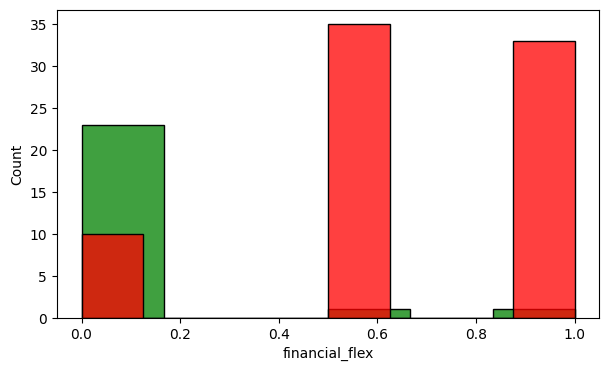

In [41]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class'] == 0]['financial_flex'],color= 'green')   # bankruptcy financial_flex
sns.histplot(df[df['class'] == 1]['financial_flex'],color='red')      # non-bankruptcy financial_flex
plt.show()

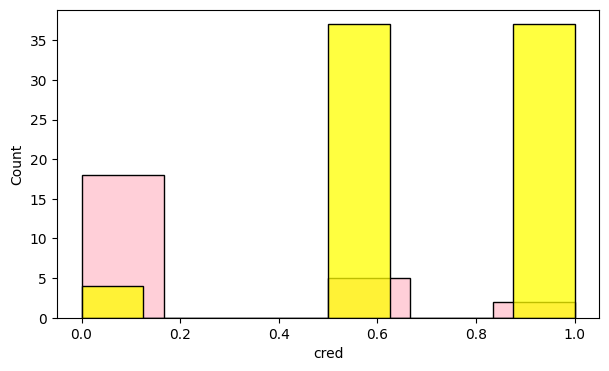

In [42]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class'] == 0]['cred'],color= 'pink')    # bankruptcy industrial_risk
sns.histplot(df[df['class'] == 1]['cred'],color='yellow')   # non-bankruptcy industrial_risk
plt.show()

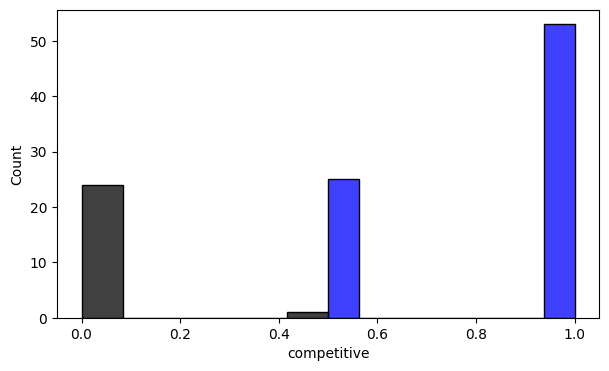

In [43]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class'] == 0]['competitive'],color= 'black')    # bankruptcy competitive
sns.histplot(df[df['class'] == 1]['competitive'],color='blue')   # non-bankruptcy competitive
plt.show()

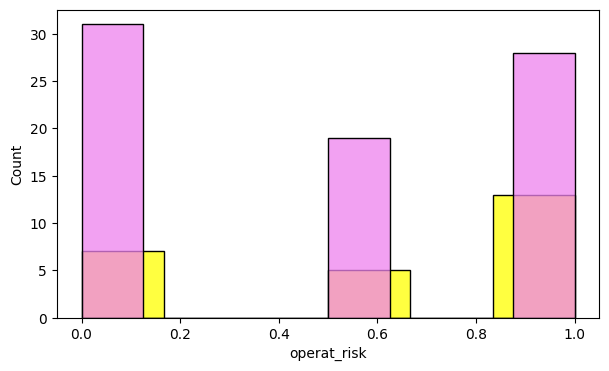

In [44]:
plt.figure(figsize=(7,4))
sns.histplot(df[df['class'] == 0]['operat_risk'],color= 'yellow')    # bankruptcy industrial_risk
sns.histplot(df[df['class'] == 1]['operat_risk'],color='violet')   # non-bankruptcy industrial_risk
plt.show()

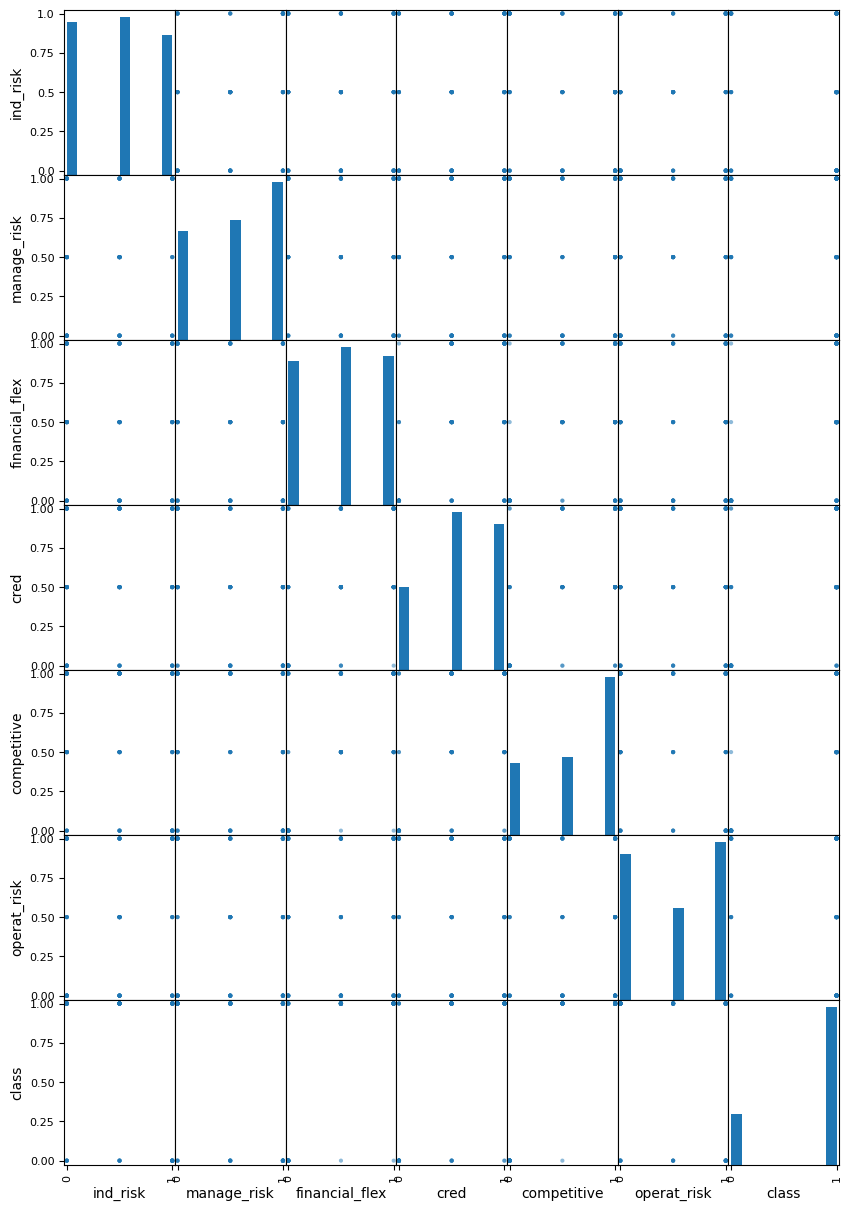

In [45]:
pd.plotting.scatter_matrix(df,figsize=(10,15))
plt.show()

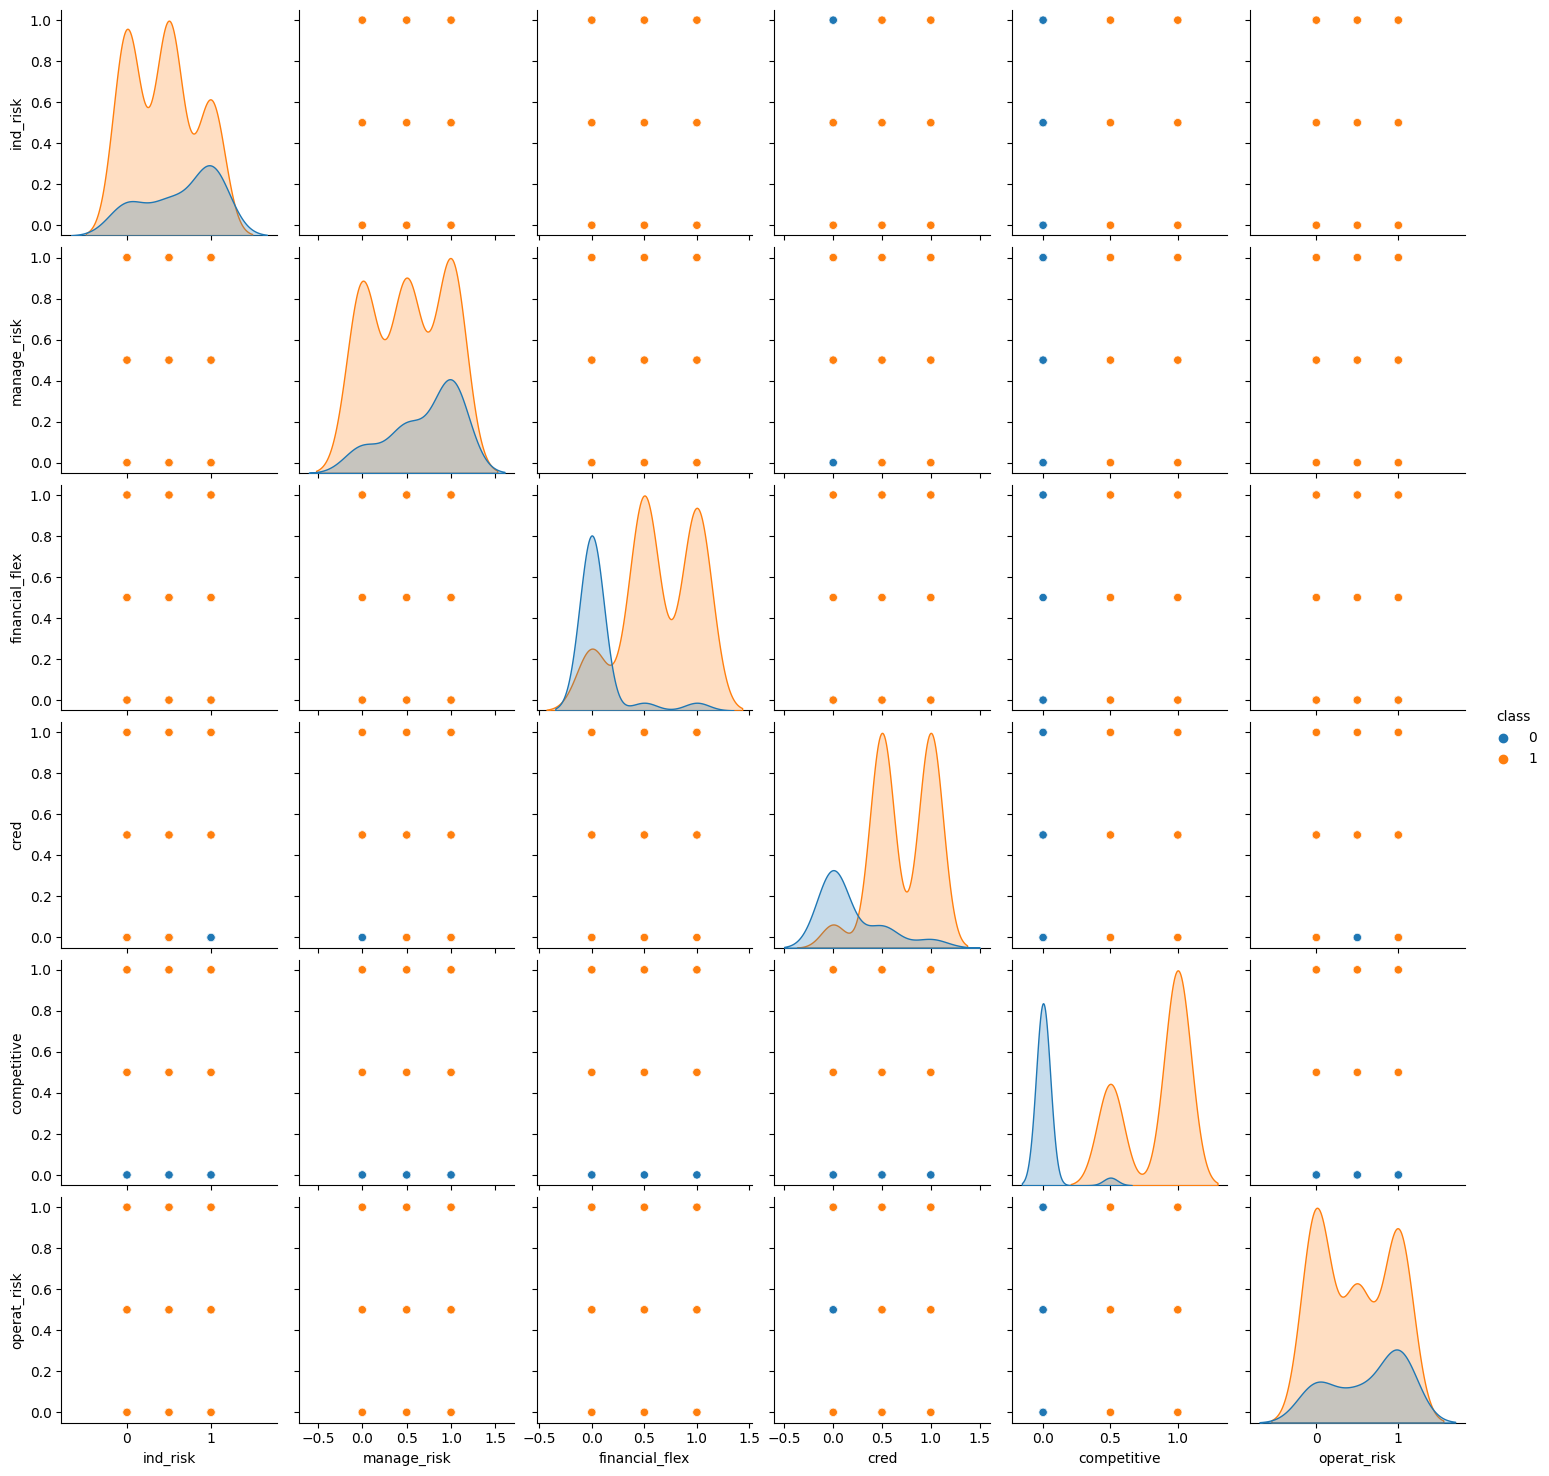

In [46]:
sns.pairplot(df, hue = 'class')

In [47]:
df['class'].value_counts()

1    78
0    25
Name: class, dtype: int64

+ Our target variable have 143 non-bankruptcy and 107 bankruptcy counts.

<AxesSubplot: xlabel='class', ylabel='count'>

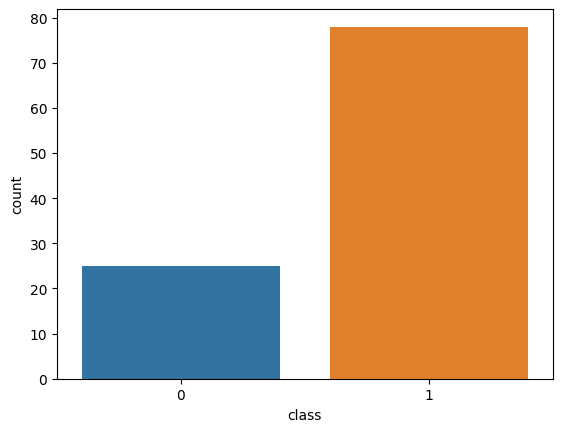

In [48]:
sns.countplot(x = df['class'])

+ We can see from the plot our data is imbalaced.

## 1) Over Sampling

In [49]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
# print(x)
# y

In [50]:
from imblearn.over_sampling import RandomOverSampler

In [51]:
ros = RandomOverSampler(random_state=0)

In [52]:
x,y = ros.fit_resample(x,y)

In [53]:
y.value_counts()

0    78
1    78
Name: class, dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

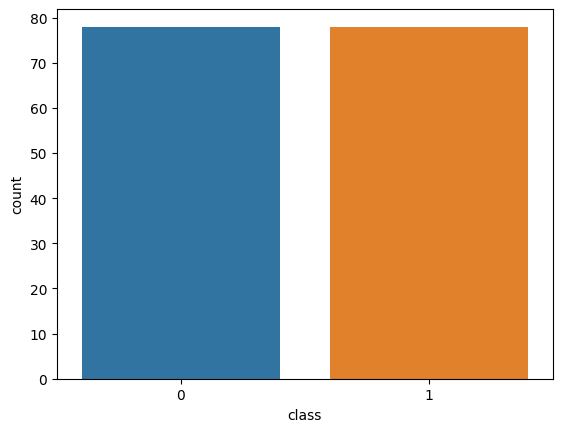

In [54]:
sns.countplot(x = y)

+ the over sampling is used because the class variable is not evenly distributed within the balance of 0 and 1 viz bankrupt or not
+ by using this over sampling technique the dataset is balanced equally

## 2) Smote

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE(random_state=0)

In [57]:
x,y = smote.fit_resample(x,y)

In [58]:
y.value_counts()

0    78
1    78
Name: class, dtype: int64

+ SMOTE is another technique used for Imbalanced Classification
+ Referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short

## Model Building

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

## 1. KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
pred_knn=knc.predict(x_test)
pred_knn

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [ ]:
# from sklearn.metrics import accuracy_score,confusion_matrix,confusion_matrix,classification_report

In [63]:
def report(model):
    y_pred = model.predict(x_test)
    print('Accuracy of model is: ', accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
#     print(confusion_matrix(y_test,y_pred))
    plot_confusion_matrix(model,x_test,y_test)

In [ ]:
# def report(model):
#     y_pred = model.predict(x_test)
#     print('Accuracy of model is: ', accuracy_score(y_test,y_pred))
#     print(classification_report(y_test,y_pred))
#     print(confusion_matrix(y_test,y_pred))
# #     plot_confusion_matrix(model,x_test,y_test)

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



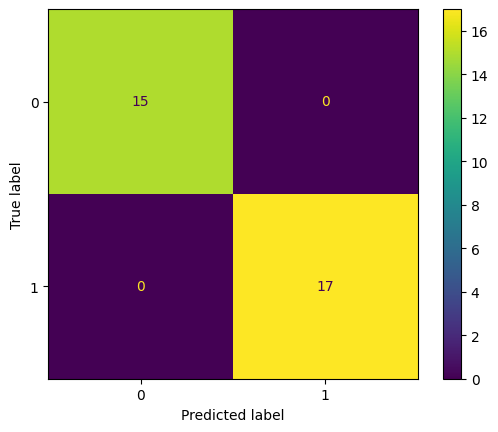

In [64]:
report(knc)

## 2. SVC

In [65]:
from sklearn.svm import SVC
clf_linear = SVC(kernel='linear')
clf_linear.fit(x_train , y_train)

SVC(kernel='linear')

In [66]:
pred_svc = clf_linear.predict(x_test)
pred_svc

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

Accuracy of model is:  0.9375
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.89      1.00      0.94        17

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.94      0.94      0.94        32



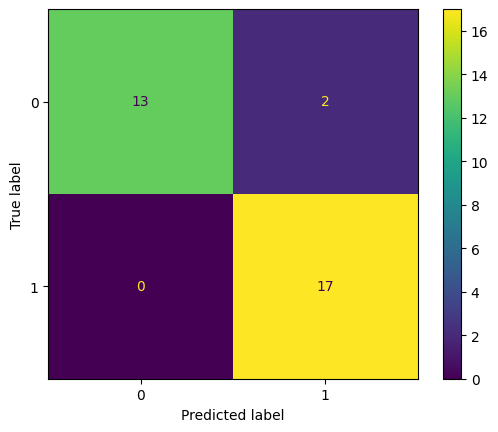

In [67]:
report(clf_linear) 

In [68]:
clf_poly = SVC(kernel='poly')
clf_poly.fit(x_train , y_train)

SVC(kernel='poly')

In [69]:
pred_svc = clf_poly.predict(x_test)
pred_svc

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  0.96875
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        17

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



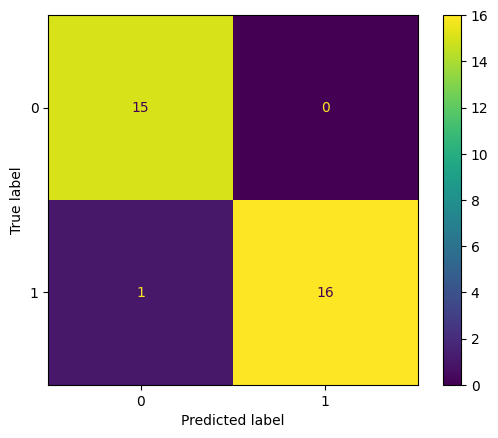

In [70]:
report(clf_poly)

## 3. Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
GNB = gnb.fit(x_train ,y_train)
pred_gnb = GNB.predict(x_test)
pred_gnb

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

Accuracy of model is:  0.9375
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.89      1.00      0.94        17

    accuracy                           0.94        32
   macro avg       0.95      0.93      0.94        32
weighted avg       0.94      0.94      0.94        32



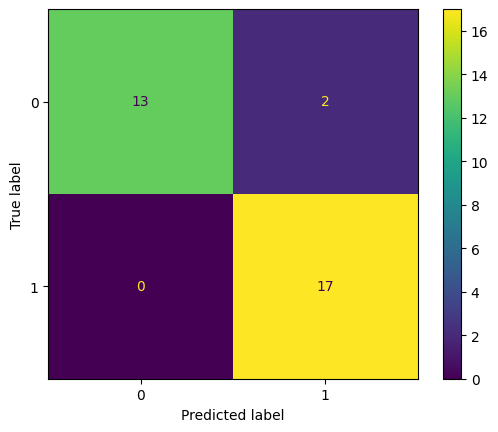

In [74]:
report(GNB)

In [75]:
MNB = mnb.fit(x_train ,y_train)
pred_mnb = MNB.predict(x_test)
pred_mnb

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

Accuracy of model is:  0.90625
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.85      1.00      0.92        17

    accuracy                           0.91        32
   macro avg       0.93      0.90      0.90        32
weighted avg       0.92      0.91      0.90        32



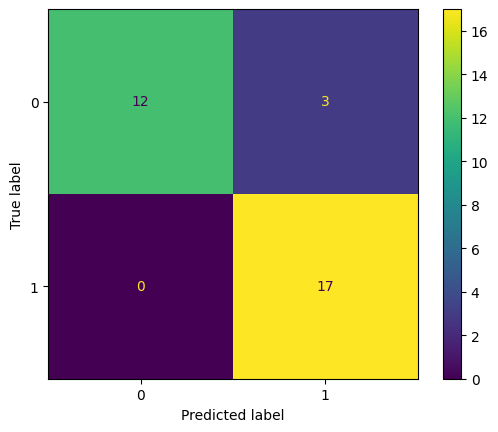

In [76]:
report(MNB)

In [77]:
BNB = bnb.fit(x_train ,y_train)
pred_bnb = BNB.predict(x_test)
pred_bnb

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  0.96875
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        17

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



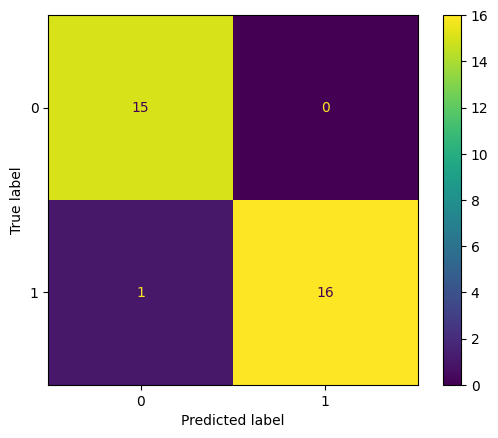

In [78]:
report(BNB)

## 4. Decision Tree

In [79]:
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

In [80]:
model_DT = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

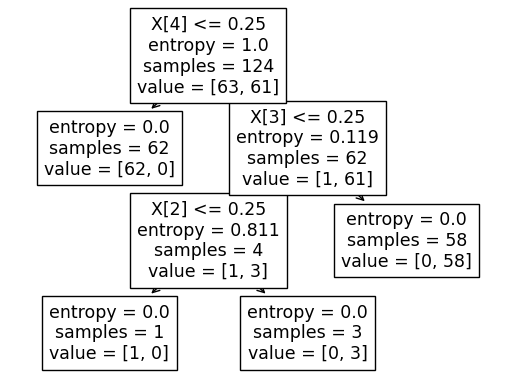

In [81]:
#PLot the decision tree
tree.plot_tree(model_DT);

In [82]:
# Predicting on test data
pred_DT = model_DT.predict(x_test)   # predicting on test data set 

In [83]:
pd.Series(pred_DT).value_counts()      # getting the count of each category 

0    16
1    16
dtype: int64

In [84]:
pred_DT

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  0.96875
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        17

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



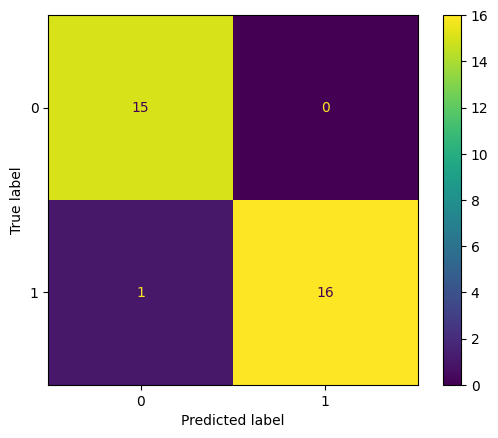

In [85]:
report(model_DT)

## 5. Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [87]:
# predicting the values
pred_LR = LR.predict(x_test)
pred_LR

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



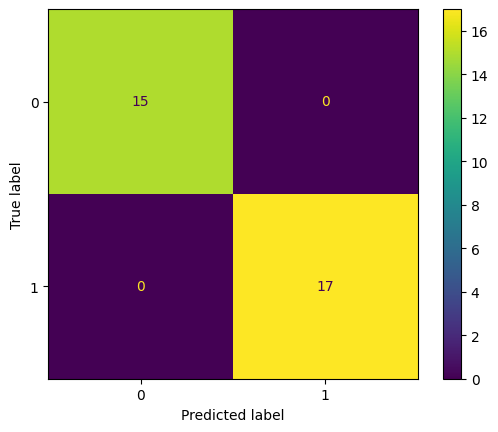

In [88]:
report(LR)

## 6. Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [91]:
pred_rf = rfc.predict(x_test)
pred_rf

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



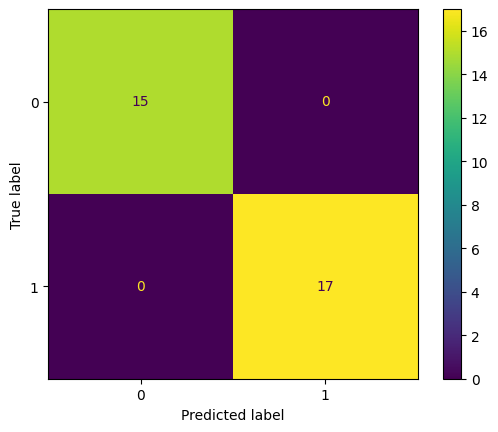

In [92]:
report(rfc)

## 7. AdaBoost Classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier(n_estimators=50, random_state=2)
ABC.fit(x_train,y_train)

AdaBoostClassifier(random_state=2)

In [94]:
# predicting the values

pred_AdaBoostClassifier = ABC.predict(x_test)
pred_AdaBoostClassifier

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



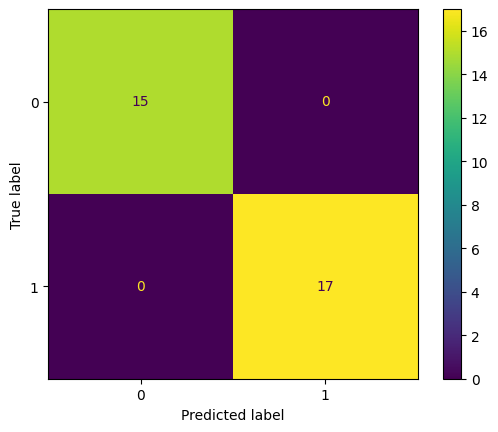

In [95]:
report(ABC)

## 8. Gradient Boost Classifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT = GradientBoostingClassifier(n_estimators=50, random_state=2)

GBDT.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=50, random_state=2)

In [97]:
# predicting the values

pred_GradientBoostingClassifier = GBDT.predict(x_test)
pred_GradientBoostingClassifier

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  0.96875
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        17

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



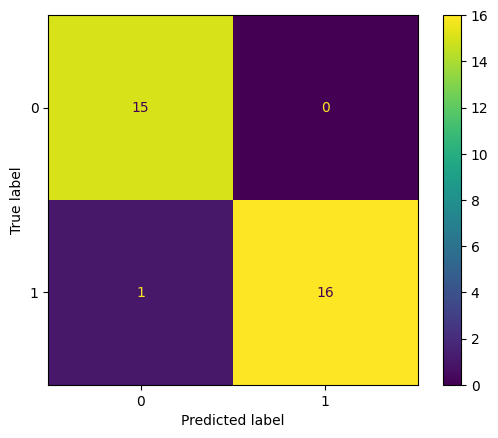

In [98]:
report(GBDT)

## 9. XG Boost Classifier

In [99]:
from xgboost import XGBClassifier
XGB = XGBClassifier(n_estimators=50,random_state=2)

XGB.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

In [100]:
# predicting the values

pred_XGBClassifier = XGB.predict(x_test)
pred_XGBClassifier

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0])

Accuracy of model is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



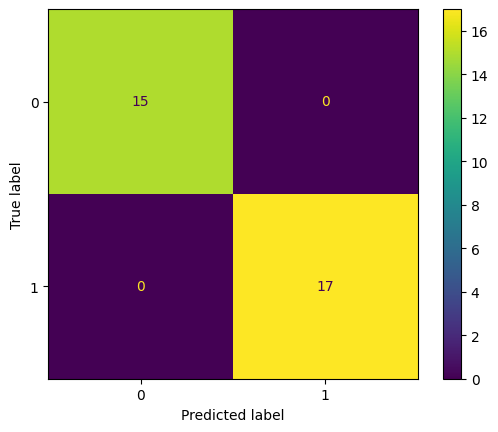

In [101]:
report(XGB)

**NOTE : From all the models we are getting 0.98% for the following models**

+ Svc clf_poly 

+ DecisionTreeClassifier

+ Bernouli's Naive Bayes

+ GradientBoostingClassifier

### SO WE CAN USE ANY OF THIS MODELS FOR DEPLOYMENT

In [104]:
import pickle
pickle_out = open("clf_poly.pkl","wb")
pickle.dump(clf_poly, pickle_out)
pickle_out.close()

In [105]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [106]:
import pickle
pickle_out1 = open("model_DT.pkl","wb")
pickle.dump(model_DT, pickle_out1)
pickle_out1.close()

In [107]:
import pickle
pickle_out4 = open("BNB.pkl","wb")
pickle.dump(BNB, pickle_out4)
pickle_out4.close()

In [108]:
import pickle
pickle_out4 = open("GBDT.pkl","wb")
pickle.dump(GBDT, pickle_out4)
pickle_out4.close()

In [109]:
!pip install streamlit -q

In [110]:
!streamlit run /content/Bank.py.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: /content/BANKRUOTCYstreamlitcodingMAHESH.py
'npx' is not recognized as an internal or external command,
operable program or batch file.
